# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Import dependencies
import pandas as pd
import requests
import json
import random
from citipy import citipy
from api_keys import weather_api_key
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# Set url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [2]:
# Run a test to confirm API working properly and see structure of data
city_name = "baltimore"
response = requests.get(query_url + city_name).json()
response

{'coord': {'lon': -76.61, 'lat': 39.29},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 64.15,
  'feels_like': 61.3,
  'temp_min': 61,
  'temp_max': 66.99,
  'pressure': 1015,
  'humidity': 63},
 'visibility': 10000,
 'wind': {'speed': 5.82, 'deg': 250},
 'clouds': {'all': 75},
 'dt': 1600918718,
 'sys': {'type': 1,
  'id': 3531,
  'country': 'US',
  'sunrise': 1600858526,
  'sunset': 1600902110},
 'timezone': -14400,
 'id': 4347778,
 'name': 'Baltimore',
 'cod': 200}

## Generate Cities List

In [3]:
# Set seed to ensure list is the same every time we run code
random.seed(557)

# Create an empty list to store the city names
city_list = []

# Generate a list of random cities
for x in range(0,1500):
    
    # Randomly generate latitude and longitude coordinates
    latitude = random.randrange(-90, 90)
    longitude = random.randrange(-180, 180)
    
    # Get nearest city based on coordinates
    city = citipy.nearest_city(latitude, longitude)
    
    # If city is not already in the city_list, add it
    if city.city_name not in city_list:
        city_list.append(city.city_name)
        
# Check how many cities are in list
len(city_list)
city_list

['busselton',
 'bluff',
 'chegdomyn',
 'otradnoye',
 'mogwase',
 'portsmouth',
 'evensk',
 'bredasdorp',
 'punta arenas',
 'mar del plata',
 'albany',
 'taolanaro',
 'kapaa',
 'kashi',
 'dikson',
 'inverell',
 'rikitea',
 'ponta do sol',
 'tasiilaq',
 'tumannyy',
 'muros',
 'bambous virieux',
 'aconibe',
 'new norfolk',
 'grand centre',
 'saint-philippe',
 'tuktoyaktuk',
 'nome',
 'tsihombe',
 'bonthe',
 'saint-pierre',
 'nikolskoye',
 'vaini',
 'hermanus',
 'mehamn',
 'mataura',
 'cabo san lucas',
 'grand river south east',
 'saskylakh',
 'barentsburg',
 'butaritari',
 'vardo',
 'hofn',
 'flinders',
 'pangnirtung',
 'toliary',
 'maghama',
 'atuona',
 'aswan',
 'morehead',
 'padang',
 'puerto ayora',
 'mys shmidta',
 'ishinomaki',
 'kautokeino',
 'cape town',
 'port alfred',
 'airai',
 'katsuura',
 'avarua',
 'illoqqortoormiut',
 'muroto',
 'rastolita',
 'bethel',
 'arraial do cabo',
 'collie',
 'east london',
 'jizan',
 'khatanga',
 'hilo',
 'miri',
 'kingori',
 'san ramon',
 'guanare

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create empty lists to store the variables we are looking at
lat_list = []
lon_list = []
temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
found_cities_list = []
country_list = []

# Set counter
counter = 1

# Note initialization of data retreival
print("Beginning data retrieval")
print("-------------------------")

# For each city in the list of cities
for city_name in city_list:
    
    # Indicate record being processed
    print(f"Processing Record {counter} | {city_name}")
    
    # Add variables to lists created earlier
    try:
        response = requests.get(query_url + city_name).json()
        lat_list.append(response["coord"]["lat"])
        lon_list.append(response["coord"]["lon"])
        temp_list.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
        found_cities_list.append(city_name)
        country_list.append(response["sys"]["country"])
    
    # If the record cannot be found, indicate skipping
    except KeyError:
        print(f"City not found. Skipping............")
    
    # Adjust counter
    counter += 1 

# Indicate completion of data retrieval
print("------------------------")
print("Data Retrieval Complete")


Beginning data retrieval
-------------------------
Processing Record 1 | busselton
Processing Record 2 | bluff
Processing Record 3 | chegdomyn
Processing Record 4 | otradnoye
Processing Record 5 | mogwase
Processing Record 6 | portsmouth
Processing Record 7 | evensk
Processing Record 8 | bredasdorp
Processing Record 9 | punta arenas
Processing Record 10 | mar del plata
Processing Record 11 | albany
Processing Record 12 | taolanaro
City not found. Skipping............
Processing Record 13 | kapaa
Processing Record 14 | kashi
Processing Record 15 | dikson
Processing Record 16 | inverell
Processing Record 17 | rikitea
Processing Record 18 | ponta do sol
Processing Record 19 | tasiilaq
Processing Record 20 | tumannyy
City not found. Skipping............
Processing Record 21 | muros
Processing Record 22 | bambous virieux
Processing Record 23 | aconibe
Processing Record 24 | new norfolk
Processing Record 25 | grand centre
City not found. Skipping............
Processing Record 26 | saint-phil

Processing Record 220 | umm lajj
Processing Record 221 | kavos
Processing Record 222 | opuwo
Processing Record 223 | xuanzhou
Processing Record 224 | qaanaaq
Processing Record 225 | torbay
Processing Record 226 | mount gambier
Processing Record 227 | cocobeach
Processing Record 228 | fastiv
Processing Record 229 | nanhai
Processing Record 230 | shimoda
Processing Record 231 | banjar
Processing Record 232 | rocha
Processing Record 233 | coihaique
Processing Record 234 | bathsheba
Processing Record 235 | payakumbuh
Processing Record 236 | mikun
Processing Record 237 | olafsvik
Processing Record 238 | teguldet
Processing Record 239 | puerto el triunfo
Processing Record 240 | marystown
Processing Record 241 | sao felix do xingu
Processing Record 242 | sao filipe
Processing Record 243 | quatre cocos
Processing Record 244 | nokaneng
Processing Record 245 | newport
Processing Record 246 | ballina
Processing Record 247 | tautira
Processing Record 248 | mabaruma
Processing Record 249 | souillac

Processing Record 447 | millinocket
Processing Record 448 | salmo
Processing Record 449 | santa maria
Processing Record 450 | ingham
Processing Record 451 | kununurra
Processing Record 452 | khorramshahr
Processing Record 453 | otane
Processing Record 454 | parana
Processing Record 455 | la reforma
Processing Record 456 | bentiu
Processing Record 457 | ostrovnoy
Processing Record 458 | aripuana
Processing Record 459 | chililabombwe
Processing Record 460 | boddam
Processing Record 461 | rincon
Processing Record 462 | palaiokhora
City not found. Skipping............
Processing Record 463 | yining
Processing Record 464 | nanortalik
Processing Record 465 | murindo
Processing Record 466 | avrameni
Processing Record 467 | agnibilekrou
Processing Record 468 | heyang
Processing Record 469 | conde
Processing Record 470 | skotterud
Processing Record 471 | ust-ilimsk
Processing Record 472 | turki
Processing Record 473 | thanh hoa
Processing Record 474 | ambodifototra
City not found. Skipping.....

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({
    "City": found_cities_list,
    "Country": country_list,
    "Latitude": lat_list,
    "Longitude": lon_list,
    "Max Temperature (F)": temp_list,
    "Humidity (%)": humidity_list,
    "Cloudiness (%)": cloudiness_list,
    "Wind Speed (mph)": wind_speed_list})

weather_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,busselton,AU,-33.65,115.33,73.00,33,51,13.11
1,bluff,NZ,-46.60,168.33,52.00,88,100,4.00
2,chegdomyn,RU,51.12,133.02,61.99,54,70,5.17
3,otradnoye,RU,59.78,30.82,55.99,99,74,6.60
4,mogwase,ZA,-25.18,27.27,56.32,61,0,1.88


In [6]:
weather_df.to_csv("../weather_data.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Confirm that there are no cities where humidity > 100%
humidity_df = weather_df.loc[weather_df["Humidity (%)"] > 100]
humidity_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

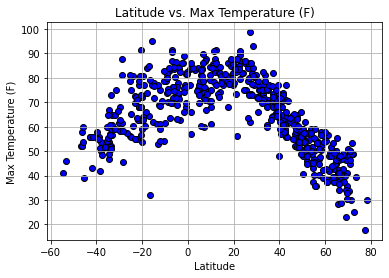

In [8]:
# Plot Latitude and Max Temperature
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature (F)"], marker="o", facecolors="blue", 
            edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Max Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

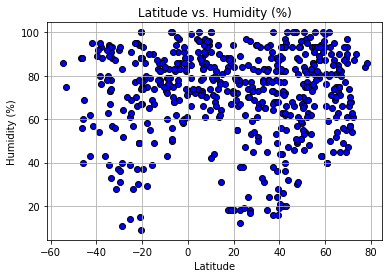

In [9]:
# Plot Latitude and Humidity
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], marker="o", facecolors="blue", 
            edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

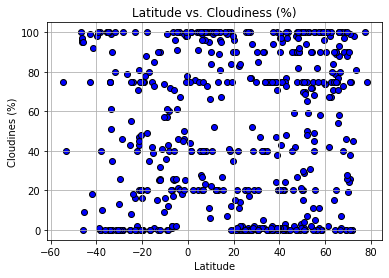

In [10]:
# Plot Latitude and Cloudiness
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], marker="o", facecolors="blue", 
            edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudines (%)")
plt.title("Latitude vs. Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

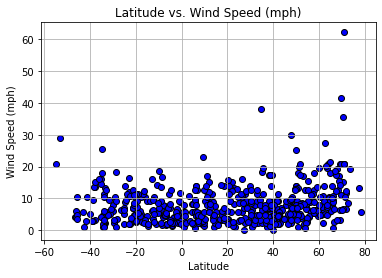

In [11]:
# Plot Latitude and Wind Speed
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (mph)"], marker="o", facecolors="blue", 
            edgecolors="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed (mph)")
plt.show()

## Linear Regression

In [12]:
northern_hem_df = weather_df.loc[weather_df["Latitude"] >= 0]
southern_hem_df = weather_df.loc[weather_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

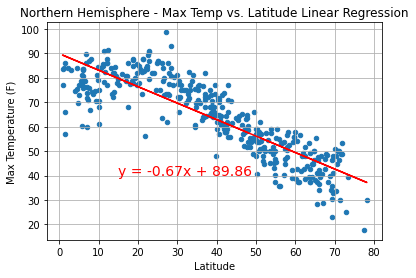

The r-value is -0.86


In [13]:
# Calculate correlation coefficient
correlation = st.pearsonr(northern_hem_df["Latitude"], northern_hem_df["Max Temperature (F)"])
correlation_coefficient = round(correlation[0], 2)

# Calculate linear regression model
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Max Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add line to plot created earlier
northern_hem_df.plot(kind="scatter", x="Latitude", y="Max Temperature (F)", grid=True,
                    title="Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (15, 40), fontsize=14,color="red")
plt.show()
print(f"The r-value is {correlation_coefficient}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

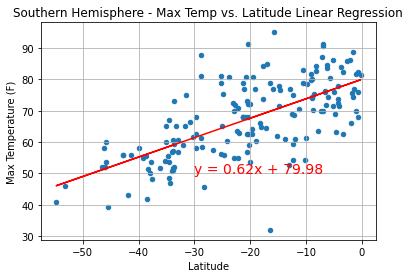

The r-value is 0.67


In [14]:
# Calculate correlation coefficient
correlation = st.pearsonr(southern_hem_df["Latitude"], southern_hem_df["Max Temperature (F)"])
correlation_coefficient = round(correlation[0], 2)

# Calculate linear regression model
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Max Temperature (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add line to plot created earlier
southern_hem_df.plot(kind="scatter", x="Latitude", y="Max Temperature (F)", grid=True,
                    title="Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-30, 50), fontsize=14,color="red")
plt.show()
print(f"The r-value is {correlation_coefficient}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

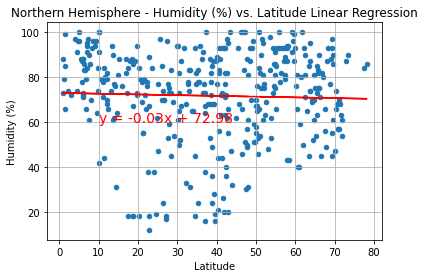

The r-value is -0.03


In [15]:
# Calculate correlation coefficient
correlation = st.pearsonr(northern_hem_df["Latitude"], northern_hem_df["Humidity (%)"])
correlation_coefficient = round(correlation[0], 2)

# Calculate linear regression model
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add line to plot created earlier
northern_hem_df.plot(kind="scatter", x="Latitude", y="Humidity (%)", grid=True,
                    title="Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10, 60), fontsize=14,color="red")
plt.show()
print(f"The r-value is {correlation_coefficient}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

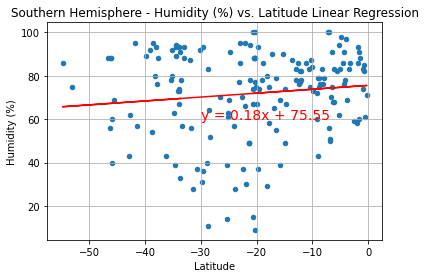

The r-value is 0.12


In [16]:
# Calculate correlation coefficient
correlation = st.pearsonr(southern_hem_df["Latitude"], southern_hem_df["Humidity (%)"])
correlation_coefficient = round(correlation[0], 2)

# Calculate linear regression model
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add line to plot created earlier
southern_hem_df.plot(kind="scatter", x="Latitude", y="Humidity (%)", grid=True,
                    title="Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-30, 60), fontsize=14,color="red")
plt.show()
print(f"The r-value is {correlation_coefficient}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

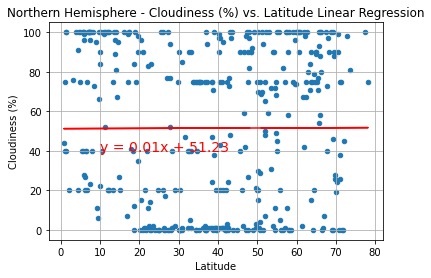

The r-value is 0.0


In [17]:
# Calculate correlation coefficient
correlation = st.pearsonr(northern_hem_df["Latitude"], northern_hem_df["Cloudiness (%)"])
correlation_coefficient = round(correlation[0], 2)

# Calculate linear regression model
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add line to plot created earlier
northern_hem_df.plot(kind="scatter", x="Latitude", y="Cloudiness (%)", grid=True,
                    title="Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10, 40), fontsize=14,color="red")
plt.show()
print(f"The r-value is {correlation_coefficient}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

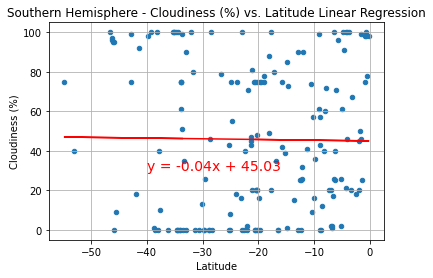

The r-value is -0.01


In [18]:
# Calculate correlation coefficient
correlation = st.pearsonr(southern_hem_df["Latitude"], southern_hem_df["Cloudiness (%)"])
correlation_coefficient = round(correlation[0], 2)

# Calculate linear regression model
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add line to plot created earlier
southern_hem_df.plot(kind="scatter", x="Latitude", y="Cloudiness (%)", grid=True,
                    title="Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-40, 30), fontsize=14,color="red")
plt.show()
print(f"The r-value is {correlation_coefficient}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

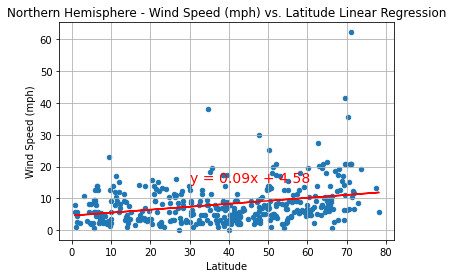

The r-value is 0.29


In [19]:
# Calculate correlation coefficient
correlation = st.pearsonr(northern_hem_df["Latitude"], northern_hem_df["Wind Speed (mph)"])
correlation_coefficient = round(correlation[0], 2)

# Calculate linear regression model
x_values = northern_hem_df["Latitude"]
y_values = northern_hem_df["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add line to plot created earlier
northern_hem_df.plot(kind="scatter", x="Latitude", y="Wind Speed (mph)", grid=True,
                    title="Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (30, 15), fontsize=14,color="red")
plt.show()
print(f"The r-value is {correlation_coefficient}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

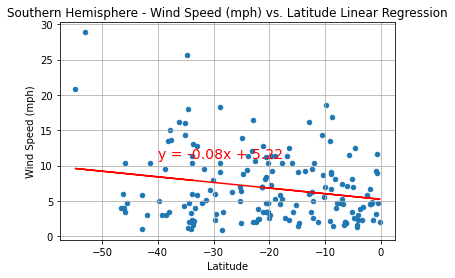

The r-value is -0.21


In [20]:
# Calculate correlation coefficient
correlation = st.pearsonr(southern_hem_df["Latitude"], southern_hem_df["Wind Speed (mph)"])
correlation_coefficient = round(correlation[0], 2)

# Calculate linear regression model
x_values = southern_hem_df["Latitude"]
y_values = southern_hem_df["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add line to plot created earlier
southern_hem_df.plot(kind="scatter", x="Latitude", y="Wind Speed (mph)", grid=True,
                    title="Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-40, 11), fontsize=14,color="red")
plt.show()
print(f"The r-value is {correlation_coefficient}")

## Analysis

Cities closer to the equator tend to be hotter than cities further away from the equator. Somewhat suprisingly, linear regression showed that latitude and temperature have a higher correlation for cities in the northern hemisphere (r value = 0.86) vs. the southern hemisphere (r value = 0.67)

While it might seem reasonable to supsect that warm places close to the equator would be sunnier, the data indicates that there is no relationship between distance from the equator and cloudiness. R value in linear regression of lattitude and cloudiness was 0.0 for the northern hemipshere and -.01 for the southern hemisphere, indicating no relationship whatsoever.

Cities closer to the equator are not necessarily more humid either. Linear regression of lattitude and humidity indicated no relationship (r value was -0.03 for the northern hemisphere and 0.12 for the southern hemipshere).

Similarly, wind speed seems to vary widely across all geographies; latitude does not seem to be much of a factor in determining wind speed. Wind speed had a slightly higher correlation with latitude than cloudiness and humidity (r value = 0.29 for northern hemipshere, -0.21 for southern hemisphere), so there may be a very weak linear relationship between latitude and wind speed.